In [ ]:
%%shell
wget http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data

--2022-02-09 01:19:15--  http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7545 (7.4K) [application/x-httpd-php]
Saving to: ‘hepatitis.data’

hepatitis.data      100%[===================>]   7.37K  --.-KB/s    in 0s      

2022-02-09 01:19:15 (487 MB/s) - ‘hepatitis.data’ saved [7545/7545]



In [ ]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## Preprocessing

In [ ]:
def hep_load(file_path) -> pd.DataFrame:
    HEP_DEAD = 1  # 1 means dead
    HEP_ALIVE = 2  # 2 means alive

    # Based on info in hepatitis.names
    col_names = ['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
                 'anorexia', 'liver big', 'liver firm', 'spleen palpable', 'spiders', # wtf?? haha see https://en.wikipedia.org/wiki/Spider_angioma#:~:text=Spider%20Angiomas%20(spider%2Dlike%20blood,and%20cured%20by%20oral%20medication.
                  'ascites', 'varices', 'bilirubin', 'alk phosphate', 'sgot', 'albumin',
                 'protime', 'histology']

    df = pd.read_csv(file_path, names=col_names)

    # Sanity check some basic info as per hepatitis.names
    assert len(df.columns) == 20
    assert len(df) == 155
    assert len(df[df['class'] == HEP_DEAD]) == 32
    assert len(df[df['class'] == HEP_ALIVE]) == 123

    # This is important to convert everything to floats. Values that can't be converted to
    # numbers will be NaNs.
    return df.apply(pd.to_numeric, errors='coerce')


def hep_show_stats(df):
    pass # TODO


def hep_clean(df):
    # TODO fill in missing data or just drop feature columns that don't really matter
    # For now let's just drop any row that has a missing value. Note that this drops around
    # half the dataset, so definitely need to improve this.
    return df.dropna()


### Data Augmentation

In [ ]:
# Load Hepaptitis Dataset
hep_data = hep_load('hepatitis.data')

In [ ]:
hep_data

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [ ]:
numerical_variables = ['age', 'bilirubin', 'protime', 'albumin', 'alk phosphate', 'sgot']

In [ ]:
# Fill in using the mean value
hep_data[numerical_variables] = hep_data[numerical_variables].fillna(hep_data[numerical_variables].mean())

In [ ]:
categorical_variables = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver big', 'liver firm', 'spleen palpable', 'spiders', 'ascites', 'varices', 'histology']

In [ ]:
hep_data[categorical_variables] = hep_data[categorical_variables].fillna(hep_data[categorical_variables].mode())

In [ ]:
hepatitis_df = hep_load('hepatitis.data')

In [ ]:
hepatitis_df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [ ]:
# Listing the columns provided in the dataset
hepatitis_df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver big', 'liver firm', 'spleen palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [ ]:
# Getting the shape => (rows, cols) of the dataset
hepatitis_df.shape

(155, 20)

In [ ]:
# Check how many null values are there in each of the columns of the dataset.
hepatitis_df.isna().sum(axis=0)

class               0
age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver big          10
liver firm         11
spleen palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk phosphate      29
sgot                4
albumin            16
protime            67
histology           0
dtype: int64

In [ ]:
# Getting some information for each of the columns in the dataset
hepatitis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            155 non-null    int64  
 1   age              155 non-null    int64  
 2   sex              155 non-null    int64  
 3   steroid          154 non-null    float64
 4   antivirals       155 non-null    int64  
 5   fatigue          154 non-null    float64
 6   malaise          154 non-null    float64
 7   anorexia         154 non-null    float64
 8   liver big        145 non-null    float64
 9   liver firm       144 non-null    float64
 10  spleen palpable  150 non-null    float64
 11  spiders          150 non-null    float64
 12  ascites          150 non-null    float64
 13  varices          150 non-null    float64
 14  bilirubin        149 non-null    float64
 15  alk phosphate    126 non-null    float64
 16  sgot             151 non-null    float64
 17  albumin         

In [ ]:
hepatitis_df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


Text(0.5, 1.0, 'Class Distribution of Hepatitis Dataset')

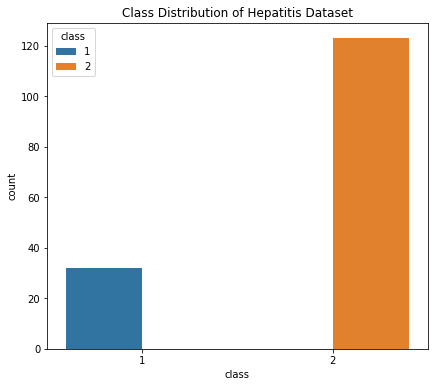

In [ ]:
# Class Distribution Plot
fig = plt.figure(figsize=(15,6))
plot = sns.countplot(x='class', data=hepatitis_df, hue='class', ax = fig.add_subplot(1,2,1))
plot.set_title('Class Distribution of Hepatitis Dataset')

[Text(1, 0.5, 'age'),
 Text(1, 1.5, 'sgot'),
 Text(1, 2.5, 'antivirals'),
 Text(1, 3.5, 'alk phosphate'),
 Text(1, 4.5, 'bilirubin'),
 Text(1, 5.5, 'histology'),
 Text(1, 6.5, 'sex'),
 Text(1, 7.5, 'spleen palpable'),
 Text(1, 8.5, 'anorexia'),
 Text(1, 9.5, 'fatigue'),
 Text(1, 10.5, 'malaise'),
 Text(1, 11.5, 'protime'),
 Text(1, 12.5, 'ascites'),
 Text(1, 13.5, 'class'),
 Text(1, 14.5, 'albumin'),
 Text(1, 15.5, 'spiders'),
 Text(1, 16.5, 'varices'),
 Text(1, 17.5, 'steroid'),
 Text(1, 18.5, 'liver big'),
 Text(1, 19.5, 'liver firm')]

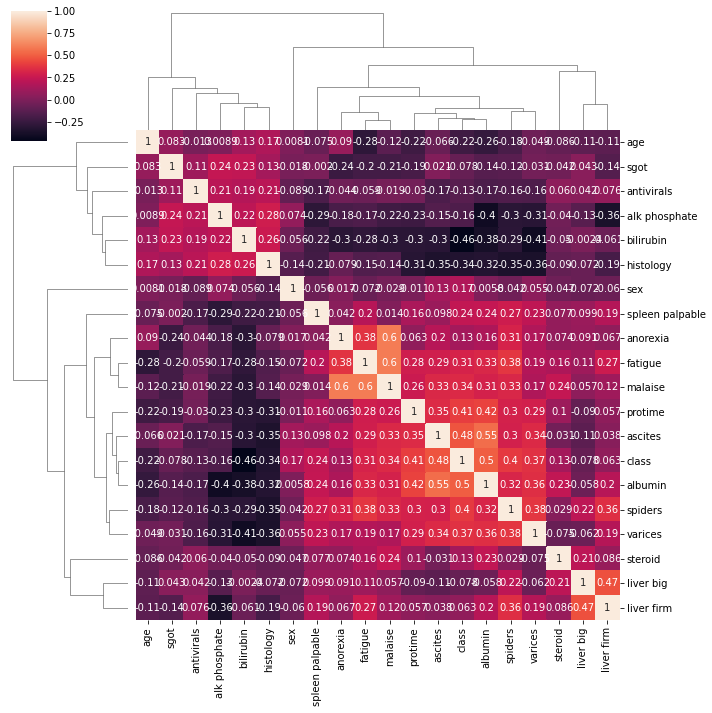

In [ ]:
#correlation between data
hepatitis_df_corr = hepatitis_df.corr()
plot_corr = sns.clustermap(data = hepatitis_df_corr,
                           metric="correlation",
                           annot=True,
                           )
plot_corr.ax_heatmap.set_yticklabels(plot_corr.ax_heatmap.get_yticklabels(),
                                     rotation=0)

Text(0.5, 1.0, 'Correlation Heatmap Hepatitis Dataset')

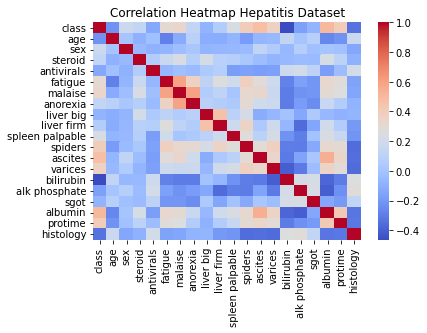

In [ ]:
#Another way of plotting heatmap
hepatitis_df_corr = hepatitis_df.corr()
plot_corr = sns.heatmap(hepatitis_df_corr,
                        xticklabels=hepatitis_df_corr.columns,
                        yticklabels=hepatitis_df_corr.columns,
                        cmap='coolwarm')
plot_corr.set_title('Correlation Heatmap Hepatitis Dataset') 

In [ ]:
# Reference - https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(hepatitis_df, 5))

Top Absolute Correlations
malaise  anorexia    0.599647
fatigue  malaise     0.595142
ascites  albumin     0.549335
class    albumin     0.503272
         ascites     0.477882
dtype: float64


In [ ]:
hepatitis_df_corr

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.134700,-0.130196,0.309269,0.337859,0.132172,-0.077630,0.063155,0.238734,0.398308,0.477882,0.368846,-0.463752,-0.161204,-0.077678,0.503272,0.409160,-0.337856
age,-0.219647,1.000000,0.008126,-0.085732,-0.013100,-0.282223,-0.115236,0.090394,-0.105480,-0.109382,-0.074853,-0.179997,-0.066220,-0.048893,0.125463,0.008924,0.082545,-0.262981,-0.222233,0.170780
sex,0.173051,0.008126,1.000000,-0.046989,-0.089249,-0.071822,-0.028820,0.017030,-0.072336,-0.059761,-0.055556,-0.042220,0.130744,0.054707,-0.056349,0.074243,-0.017652,0.005828,-0.011141,-0.137450
steroid,0.134700,-0.085732,-0.046989,1.000000,0.060101,0.164326,0.242942,0.074380,0.214488,0.086463,0.077071,0.028675,-0.031453,-0.074925,-0.050240,-0.040164,-0.042458,0.228148,0.102978,-0.090109
antivirals,-0.130196,-0.013100,-0.089249,0.060101,1.000000,-0.059445,-0.018540,-0.043552,0.042350,0.075593,-0.172756,-0.159695,-0.171184,-0.161165,0.185023,0.205236,0.108138,-0.170074,-0.030287,0.209242
fatigue,0.309269,-0.282223,-0.071822,0.164326,-0.059445,1.000000,0.595142,0.376350,0.112892,0.272435,0.195256,0.383333,0.289931,0.187125,-0.278918,-0.165744,-0.202089,0.328319,0.279844,-0.151556
malaise,0.337859,-0.115236,-0.028820,0.242942,-0.018540,0.595142,1.000000,0.599647,0.057090,0.118382,0.013690,0.325979,0.332910,0.170193,-0.299602,-0.215880,-0.205128,0.307685,0.263691,-0.140592
anorexia,0.132172,0.090394,0.017030,0.074380,-0.043552,0.376350,0.599647,1.000000,0.091287,0.067320,0.041667,0.309614,0.196116,0.174380,-0.303109,-0.181680,-0.238408,0.163661,0.063001,-0.078895
liver big,-0.077630,-0.105480,-0.072336,0.214488,0.042350,0.112892,0.057090,0.091287,1.000000,0.467950,0.099083,0.220389,-0.110876,-0.062366,-0.002392,-0.130565,0.043023,-0.057578,-0.089997,-0.072269
liver firm,0.063155,-0.109382,-0.059761,0.086463,0.075593,0.272435,0.118382,0.067320,0.467950,1.000000,0.187541,0.355901,0.037966,0.189999,-0.060703,-0.356068,-0.138305,0.199022,0.056773,-0.191663


In [ ]:
hepatitis_df.drop("protime", axis = 1, inplace=True)
hepatitis_df.shape

(155, 19)

In [ ]:
# sns.pairplot(hepatitis_df, diag_kind='kde', hue="class")

<Figure size 1440x720 with 0 Axes>

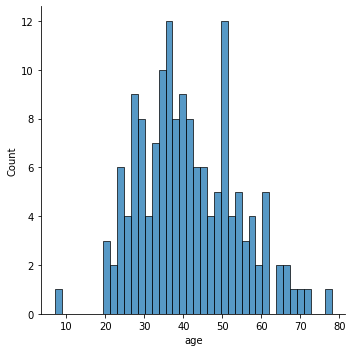

In [ ]:
plt.figure(figsize=(20, 10))
sns.displot(hepatitis_df.age, bins=40)

#it shows that most of the people have age between 25-50 (approx.)
# maximum age = 36-38 and 50-55. Only few people with age <=30 and age>=62 suffer from hepatitis.

<Figure size 1440x720 with 0 Axes>

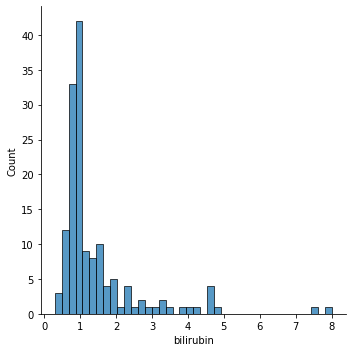

In [ ]:
# Various Plots for Checking the Bilirubin distribution for various integer values
plt.figure(figsize=(20, 10))
sns.displot(hepatitis_df.bilirubin, bins=40)

# This indicate that people with lower bilirubin (0-2) are more prone to hepatitis.

<Figure size 1440x720 with 0 Axes>

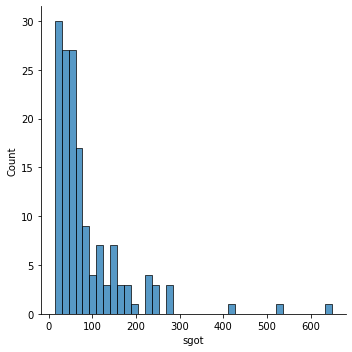

In [ ]:
# Plot for checking the SGOT distribution

plt.figure(figsize=(20, 10))
sns.displot(hepatitis_df.sgot, bins=40)

<Figure size 1440x720 with 0 Axes>

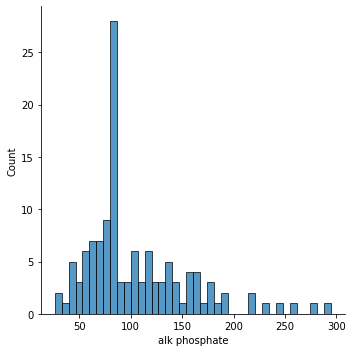

In [ ]:
plt.figure(figsize=(20, 10))
sns.displot(hepatitis_df['alk phosphate'], bins=40)

# This implies that Maximum people have alkaline phosphate value of 80-100

In [ ]:
# Gender distribution
px.histogram(hepatitis_df.sex)

#This implies that most of the people in the given dataset are female and Females are more prone to Hepatitis as compared to Males

In [ ]:
px.histogram(hepatitis_df['class'])

In [ ]:
hepatitis_df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



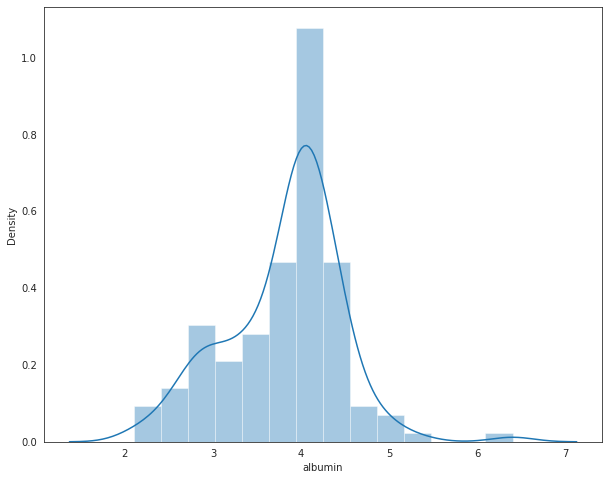

In [ ]:
sns.set_style('white')
plt.figure(figsize=(10, 8))
sns.distplot(a= hepatitis_df['albumin'], kde=True)

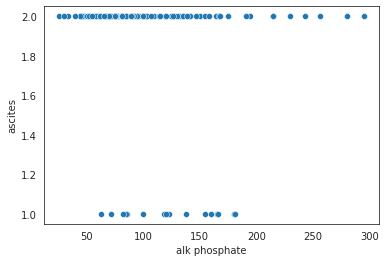

In [ ]:
sns.scatterplot(x=hepatitis_df['alk phosphate'], y=hepatitis_df['ascites'])

1 sex
2 steroid
3 antivirals
4 fatigue
5 malaise
6 anorexia
7 liver big
8 liver firm
9 spleen palpable
10 spiders
11 ascites
12 varices
13 histology


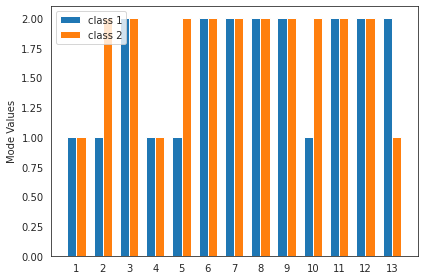

In [ ]:
mode = hepatitis_df.drop(columns=["age","bilirubin",	"alk phosphate",	"sgot",	"albumin"]).groupby(by=["class"]).agg(lambda x:x.value_counts().index[0])

#class 1 means die and class 2 means live
#visualization of the data
label_names = list(mode.columns)
for i, label in enumerate(label_names):
    print(i + 1, label)
labels = [i for i in range(1, 14)]

class1_mode = mode.iloc[0].astype(int)
class2_mode = mode.iloc[1].astype(int)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, class1_mode, width, label='class 1')
rects2 = ax.bar(x + width/2, class2_mode, width, label='class 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mode Values')
# ax.set_title('')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

In [ ]:
numeric = hepatitis_df.select_dtypes(include=np.number)
numeric_columns = numeric.columns

In [ ]:
hepatitis_df[numeric_columns] = hepatitis_df[numeric_columns].fillna(hepatitis_df.mean())

In [ ]:
hepatitis_df.isna().sum(axis=0)

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver big          0
liver firm         0
spleen palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk phosphate      0
sgot               0
albumin            0
histology          0
dtype: int64

# KNN

In [ ]:
# # Changelist: Added cross validation, fixed accuracy calculation. Not entirely sure about deicsion boundary 
# class KNN:
#     EUCLIDEAN = lambda x1, x2: np.sqrt(np.sum((x1 - x2) ** 2, axis=-1))
#     MANHATTEN = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

#     def __init__(self, K, dist_fn):
#         self.K = K
#         self.dist_fn = dist_fn

#         if dist_fn == KNN.EUCLIDEAN:    self.dist_fn_name = 'euclidean'
#         elif dist_fn == KNN.MANHATTEN:  self.dist_fn_name = 'manhatten'

#     def __str__(self):
#         return f'KNN model with K = {self.K} using {self.dist_fn_name} distance function'

#     def fit(self, X: np.ndarray, y: np.ndarray):
#         # Just store the data and class labels
#         self.X_train = X
#         self.y_train = y

#     def predict(self, X_test: np.ndarray) -> np.ndarray:

#         X_test = X_test
#         n_test = len(X_test)
#         '''
#         We want to find distance of every point in X_test of shape (n_test,n_features)
#         with every point in X_train of shape (n_train, n_features). To do this in one 
#         numpy operation, we pad X_test with a dummy axis so that its shape is 
#         (n_train, 1, n_features).
#         See https://stackoverflow.com/a/37903795/3613100 for a good explanation.
#         distances will be of shape (n_test, n_train) and will contain distance of each point
#         in X_test (axis 0) with each point in X_train (axis 1). 
#         '''
#         distances = self.dist_fn(X_test[:, np.newaxis, :], self.X_train)

#         '''
#         Initialize a matrix to store KNN's indices for each test datapoint. This will have shape 
#         (n_test, K). The i'th row will store indices of KNN's to the i'th test point. The 
#         indices refer to indices in self.X_train.
#         '''
#         knns_indices = np.zeros((n_test, self.K), dtype=int)

#         # i'th entry in y_pred will be the predicted class label of i'th test datapoint.
#         y_pred = np.zeros(n_test, dtype=int)

#         for i in range(n_test):
#             knns_indices[i, :] = np.argsort(distances[i])[:self.K]
#             knn_classes = self.y_train[knns_indices[i]]
#             vals, counts = np.unique(knn_classes, return_counts=True)
#             y_pred[i] = vals[np.argmax(counts)]

#         return y_pred

# def evaluate_acc(y_pred: np.ndarray, y_actual: np.ndarray) -> float:
#     # Returns accuracy %.
#     num_correct_labels = np.sum(y_pred == y_actual)
#     return (num_correct_labels / len(y_pred)) * 100.0


# def cross_validate(model, all_data: pd.DataFrame, L=3) -> float:
#     '''
#     Returns L-folds cross-validated accuracy %.
#     '''
#     total_size = len(all_data)
#     # It's possible for L to not be an exact multiple of total_size, but
#     # in such cases the number of dropped datapoints will be very small
#     # compared to total data points.
#     fold_size = total_size // L

#     # Extract labels as a separate array
#     labels = all_data['class']
#     # Remove labels from data array
#     all_data.drop('class', axis=1, inplace=True)
#     total_accuracy = 0.0

#     for l in range(L):
#         # Create empty dataframes to hold training set
#         training_data = pd.DataFrame(dtype='float64', columns=all_data.columns)
#         training_labels = pd.Series(dtype='int64')

#         validation_data = training_data = pd.DataFrame(dtype='float64', columns=all_data.columns)
#         validation_labels = pd.Series(dtype='int64')

#         current_fold = 0
#         current_start_index = 0
#         while current_fold < L:
#             end_index = current_start_index + fold_size
#             fold_data = all_data[current_start_index : end_index]
#             fold_labels = labels[current_start_index : end_index]
#             # print(f'Sliced from {current_start_index} to {end_index}')

#             if current_fold == l:
#                 # Hold out the l'th fold data for validation
#                 validation_data = fold_data
#                 validation_labels = fold_labels
#             else:
#                 # else add the (l-1) folds to training set
#                 training_data = training_data.append(fold_data)
#                 training_labels = training_labels.append(fold_labels)

#             current_fold += 1
#             current_start_index = end_index

#         # At this point we have the correct train and validation sets for the L'th run
#         model.fit(training_data.to_numpy(), training_labels.to_numpy())
#         y_pred = model.predict(validation_data.to_numpy())

#         accuracy = evaluate_acc(y_pred, validation_labels.to_numpy())
#         print(f'Accuracy for {model} for cross validation run {l} with folds size {fold_size} is {round(accuracy,2)}%.')
#         total_accuracy += accuracy

#     return total_accuracy / L


# def run_experiment(dataset, K, distance_fn):

#         if dataset == 'diabetes':
#             all_data = dr_load('messidor_features.arff')
#             dr_show_stats(all_data)
#             # No need to clean this as there are no missing values
#         elif dataset == 'hepatitis':
#             all_data = hep_load('hepatitis.data')
#             hep_show_stats(all_data)
#             all_data = hep_clean(all_data)

#         else:   raise Exception('Wrong dataset name!')

#         # Everything below this is train and everything after is test
#         # Using a 60/40% split for train/test
#         split_index = int(len(all_data) * 0.7)

#         # Vanilla train/test KNN
        

        

#         # Vanilla train/test KNN
#         knn = KNN(K=K, dist_fn=distance_fn)
#         X_train = all_data[:split_index].drop('class', axis=1).to_numpy()
#         y_train = all_data['class'][:split_index].to_numpy()
#         knn.fit(X_train, y_train)

#         X_test = all_data[split_index:].drop('class', axis=1).to_numpy()
#         y_test = all_data['class'][split_index:].to_numpy()

#         y_pred = knn.predict(X_test)
#         accuracy = evaluate_acc(y_pred, y_test)
#         print(f'Accuracy of {knn} on {dataset} dataset is {round(accuracy, 2)}%.')
        

#         # Decision boundary
#         RESOLUTION = 500

#         # Discretize the feature space
#         NUM_FEATURES = X_test.shape[1]
#         discretized_features = []
#         for i in range(NUM_FEATURES):
#             discretized_features.append(
#                 np.linspace(np.min(X_test[:, i]), np.max(X_test[:, i]), RESOLUTION))
#         all_discretized = np.vstack(discretized_features).T

#         # feature1v = np.linspace(np.min(X_test[:, 2]), np.max(X_test[:, 2]), RESOLUTION)
#         # feature2v = np.linspace(np.min(X_test[:, 3]), np.max(X_test[:, 3]), RESOLUTION)
#         # discretized = np.vstack((feature1v.ravel(), feature2v.ravel())).T

#         x0, x1 = np.meshgrid(discretized_features[3], discretized_features[9])
#         x_all = np.vstack((x0.ravel(), x1.ravel())).T

#         discreized_predictions = knn.predict(all_discretized)

#         BLUE = [0, 0, 1]
#         RED =  [1, 0, 0]

#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection='3d')
#         ax.scatter(X_test[:, 3], X_test[:, 9], y_test, c=y_test, cmap=plt.cm.coolwarm)
#         ax.scatter(X_test[:, 3], X_test[:, 9], y_pred, c=y_pred, cmap=plt.cm.coolwarm)
#         ax.set_xlabel('feature 3')
#         ax.set_ylabel('feature 9')
#         ax.set_zlabel('class')
#         plt.show()


#         '''
#         sklearn comparison        
#         from sklearn.neighbors import KNeighborsClassifier
#         from sklearn.metrics import accuracy_score
#         knn = KNeighborsClassifier(n_neighbors = K)
#         knn.fit(X_train, y_train)
#         y_pred = knn.predict(X_test)
#         print('KNN Breast cancer Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
#         '''

#         #  Cross validation
#         L = 3   # number of cross validation folds
#         Ks = [i for i in range(1, 20)]     # different values of K's to check for

#         best_model = None
#         best_validation_accuracy = -1.0
#         all_validation_accs = []
#         # np.random.seed(551)

#         for K in Ks:
#             # Get all the training data (training+validation sets)
#             training_data = all_data[:split_index].copy()

#             # Remaining data is for test set
#             testing_data = all_data[split_index:].drop('class', axis=1)
#             testing_labels = all_data['class'][split_index:]

#             knn = KNN(K=K, dist_fn=distance_fn)
#             # Run cross validation
#             cross_accuracy = cross_validate(knn, training_data, L=L)
#             print(f'Average {L} folds cross-validation accuracy '
#                   f'for {knn} is {round(cross_accuracy, 2)}%.')

#             all_validation_accs.append(cross_accuracy)
#             if cross_accuracy > best_validation_accuracy:
#                 best_validation_accuracy = cross_accuracy
#                 best_model = knn

#             # Run on test set
#             test_pred = knn.predict(testing_data.to_numpy())
#             test_acc = evaluate_acc(test_pred, testing_labels.to_numpy())
#             print(f'Testing accuracy for {knn} is {round(test_acc, 2)}%.')

#         print(f'{best_model} was found to be the best model with validation accuracy = '
#               f'{round(best_validation_accuracy,2)}%.')


#         plt.scatter(Ks, all_validation_accs)
#         plt.plot(Ks, all_validation_accs)
#         plt.xlabel('K')
#         plt.ylabel('validation accuracy %')
#         plt.show()
#         pass


# print('Hepatitis dataset')
# run_experiment('hepatitis', K=4, distance_fn=KNN.MANHATTEN)


# Decision Trees

### Helper Functions

In [ ]:
# def load_data(file_path, column_names) -> pd.DataFrame:
#     df = pd.read_csv(file_path, names=column_names)
#     return df

In [ ]:
# def clean_data(df) -> pd.DataFrame:
#     df = df.apply(pd.to_numeric, errors='coerce')
#     df = df.dropna()
#     return df

In [ ]:
# def train_test_split(df, train_percent, y_col):
#     msk = np.random.rand(len(df)) < train_percent
#     train = df[msk]
#     test = df[~msk]
#     x_train = train.loc[:, train.columns != y_col]
#     y_train = train.loc[:, train.columns == y_col]
#     x_test = test.loc[:, test.columns != y_col]
#     y_test = test.loc[:, test.columns == y_col]
#     return x_train.to_numpy(), y_train.to_numpy().ravel(), x_test.to_numpy(), y_test.to_numpy().ravel()

### Node and Tree Class

In [ ]:
# class Node:
#     def __init__(self, data_indices, parent):
#         self.data_indices = data_indices
#         self.left = None
#         self.right = None
#         self.split_feature = None
#         self.split_value = None
#         self.depth = 0
#         self.data = None
#         self.probability_of_each_class = None
#         if parent:
#             self.depth = parent.depth + 1

In [ ]:
# class DecisionTree:
#     def __init__(self, cost_function='misclassification', max_depth=3, min_leaf_instances=1):
#         self.max_depth = max_depth
#         self.root = None
#         if cost_function == 'misclassification':
#             self.cost_function = self.misclassification_cost
#         elif cost_function == 'entropy':
#             self.cost_function = self.entropy_cost
#         elif cost_function == 'gini':
#             self.cost_function = self.gini_index_cost
#         self.num_classes = None
#         self.min_leaf_instances = min_leaf_instances
#         self.data = None
#         self.labels = None

#     @staticmethod
#     def misclassification_cost(data_points):
#         return 1 - np.max(np.bincount(data_points) / np.sum(np.bincount(data_points)))

#     @staticmethod
#     def entropy_cost(data_points):
#         probability_of_each_class = np.bincount(data_points) / len(data_points)
#         probability_of_each_class = probability_of_each_class[probability_of_each_class > 0]
#         return -np.sum(probability_of_each_class * np.log(probability_of_each_class))

#     @staticmethod
#     def gini_index_cost(data_points):
#         probability_of_each_class = np.bincount(data_points) / len(data_points)
#         return 1 - np.sum(np.square(probability_of_each_class))

#     def split(self, node):
#         best_cost = np.inf
#         best_feature = None
#         best_test_value = None

#         # Sort the data points in ascending order
#         data = self.data[node.data_indices]
#         sorted_data = np.sort(data, axis=0)

#         number_of_instances = data.shape[0]
#         number_of_features = data.shape[1]

#         # Calculating average values of adjacent data points
#         candidates = (sorted_data[1:] + sorted_data[:-1]) / float(2)

#         # Calculate the best feature and a value from the feature
#         # to use for the branching
#         for feature in range(number_of_features):
#             feature_data_points = data[:, feature]
#             # Test for average values between each
#             # data points in the feature
#             for value in candidates[:, feature]:
#                 left_indices = node.data_indices[feature_data_points <= value]
#                 right_indices = node.data_indices[feature_data_points > value]

#                 # If a value causes either left or right sub array to be 0
#                 # then the best cost is inf
#                 if len(left_indices) == 0 or len(right_indices) == 0:
#                     continue

#                 # Calculate a weighted cost, using the given cost function
#                 left_cost = self.cost_function(self.labels[left_indices])
#                 right_cost = self.cost_function(self.labels[right_indices])
#                 cost = (left_indices.shape[0] * left_cost + right_indices.shape[0] * right_cost) / number_of_instances

#                 # Update the cost if there is a better cost
#                 if cost < best_cost:
#                     best_cost = cost
#                     best_feature = feature
#                     best_test_value = value

#         return best_cost, best_feature, best_test_value

#     def _fit_tree(self, node):
#         # Calculate the probability of reaching this node
#         probability_of_each_class = np.bincount(self.labels[node.data_indices], minlength=self.num_classes)
#         node.probability_of_each_class = probability_of_each_class / np.sum(probability_of_each_class)

#         # Stopping criteria
#         # (i) maximum depth
#         # (ii) minimum number of elements in the leaf nodes
#         # (iii) if entropy, calculate the improvement in the entropy
#         if node.depth == self.max_depth \
#                 or len(node.data_indices) <= self.min_leaf_instances:
#             return

#         # Get the optimal split for the data points associated with the node
#         cost, node.split_feature, node.split_value = self.split(node)

#         # If the optimal cost is inf, then there's nothing more to do
#         if np.isinf(cost):
#             return

#         # Get the data points towards the left and right of the split respectively
#         test = self.data[node.data_indices, node.split_feature] <= node.split_value
#         node.left = Node(node.data_indices[test], node)
#         node.right = Node(node.data_indices[np.logical_not(test)], node)

#         # Run the _fit_tree method recursively for the individual splits
#         self._fit_tree(node.left)
#         self._fit_tree(node.right)

#     def fit(self, data, labels):
#         self.data = data
#         self.labels = labels
#         self.num_classes = np.max(self.labels) + 1
#         self.root = Node(np.arange(data.shape[0]), None)
#         self._fit_tree(self.root)

#     def predict(self, test_data):
#         # Initialise the probabilities with 0
#         probability_of_each_class = np.zeros((test_data.shape[0], self.num_classes))
#         # For every data point in the test data
#         # follow the tree branching until you reach the leaf
#         # finally calculate the probability
#         for n, x in enumerate(test_data):
#             node = self.root
#             while node.left:
#                 if x[node.split_feature] <= node.split_value:
#                     node = node.left
#                 else:
#                     node = node.right
#             probability_of_each_class[n, :] = node.probability_of_each_class
#         return probability_of_each_class

### Hepatitis Dataset

In [ ]:
# # Load and clean the data
# hep_columns = ['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
#               'anorexia', 'liver big', 'liver firm', 'spleen palpable', 'spiders',
#               'ascites', 'varices', 'bilirubin', 'alk phosphate', 'sgot', 'albumin',
#               'protime', 'histology']

# hep = load_data('hepatitis.data', hep_columns)
# hep = clean_data(hep)

# # Train tet splitting
# # Also convert the data to nd arrays
# x_train, y_train, x_test, y_test = train_test_split(hep, train_percent=0.8, y_col='class')
# tree = DecisionTree(max_depth=25)

# tree.fit(x_train, y_train)

# probs_test = tree.predict(x_test)
# y_pred = np.argmax(probs_test, 1)
# accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
# print(f'accuracy is {accuracy * 100:.1f}.')

accuracy is 61.5.


### Decision Tree Decision Boundaries

In [ ]:
# hep_columns = ['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
#               'anorexia', 'liver big', 'liver firm', 'spleen palpable', 'spiders',
#               'ascites', 'varices', 'bilirubin', 'alk phosphate', 'sgot', 'albumin',
#               'protime', 'histology']

# hep = load_data('hepatitis.data', hep_columns)
# hep_top_corr = hep[['albumin', 'sgot', 'class']]
# # hep_top_corr = hep[['malaise', 'albumin', 'class']]
# hep_top_corr = clean_data(hep_top_corr)
# hep_top_corr = hep_top_corr.apply(pd.to_numeric, errors='coerce')
# hep_top_corr = hep_top_corr.dropna()

In [ ]:
# def decision_boundary(data, y_label, model):
#   x = data.loc[:, data.columns != y_label].to_numpy()
#   y = data.loc[:, data.columns == y_label].to_numpy().ravel()
#   x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
#   y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
#   xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
#   model.fit(x, y)
#   y_pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
#   y_pred = np.argmax(y_pred, 1)
#   y_pred = y_pred.reshape(xx.shape)
#   cs = plt.contourf(xx, yy, y_pred, cmap=plt.cm.Pastel1)
#   plt.suptitle("Decision surface of decision trees for Hepatitis Dataset")
#   for i, color in zip(range(1, 3), "rb"):
#           idx = np.where(y == i)
#           plt.scatter(
#               x[idx, 0],
#               x[idx, 1],
#               c=color,
#               cmap=plt.cm.RdYlBu,
#               s=10,
#               alpha=0.5
#           )

In [ ]:
# tree = DecisionTree(cost_function='entropy', max_depth=5, min_leaf_instances=2)

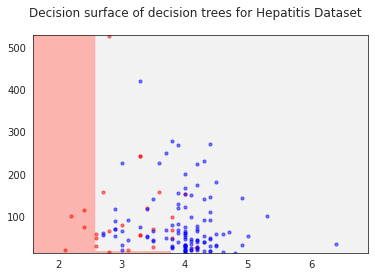

In [ ]:
# decision_boundary(hep_top_corr, 'class', tree)